In [1]:
import pandas as pd
from operator import attrgetter
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

In [2]:
customers = pd.read_csv('C:/Users/User/projects/PA_project/olist_customers_dataset.csv')
orders = pd.read_csv('C:/Users/User/projects/PA_project/olist_orders_dataset.csv')
order_items = pd.read_csv('C:/Users/User/projects/PA_project/olist_order_items_dataset.csv')

In [3]:
# Задача 1. Оценить месячный retention в оформление заказа с помощью когортного анализа.

In [4]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [5]:
# Смотрим на типы данных в датафрейме
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [6]:
# Преобразуем столбцы с датами в тип datetime
columns_to_convert = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                      'order_delivered_customer_date', 'order_estimated_delivery_date']
orders[columns_to_convert] = orders[columns_to_convert].apply(pd.to_datetime)

In [7]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [8]:
# Проверяем наличие пропусков в данных
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
# Чтобы рассчитать месячный retention в оформление заказа возьмем заказы, у которых подтверждена оплата,
# т.к. тогда заказ считается оформленным

In [10]:
orders[orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [11]:
# Создаем копию данных, чтобы избежать изменений в исходном DataFrame
orders_copy = orders.copy()

In [12]:
orders_copy.dropna(subset=['order_approved_at'], how='all', inplace=True)
orders_copy.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64

In [13]:
orders_copy.groupby('order_status').agg(n_orders=('order_status', 'count')).reset_index()

,order_status,n_orders
0,approved,2
1,canceled,484
2,delivered,96464
3,invoiced,314
4,processing,301
5,shipped,1107
6,unavailable,609


In [14]:
# Исключаем из DataFrame отмененные заказы
excluded_statuses = ['canceled', 'unavailable']
orders_copy_filtered = orders_copy.query('order_status not in @excluded_statuses')

In [15]:
orders_copy_filtered.groupby('order_status').agg(n_orders=('order_status', 'count')).reset_index()

,order_status,n_orders
0,approved,2
1,delivered,96464
2,invoiced,314
3,processing,301
4,shipped,1107


In [16]:
# Создаем DataFrame для анализа по когортам
data_cohort_analysis = pd.merge(orders_copy_filtered, customers, on='customer_id', how='inner')
data_cohort_analysis = data_cohort_analysis[['customer_unique_id', 'order_approved_at']]
data_cohort_analysis.head(3)

,customer_unique_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15
1,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23


In [17]:
# Извлекаем месяц и день заказа
data_cohort_analysis['order_period'] = data_cohort_analysis['order_approved_at'].dt.to_period('M')
data_cohort_analysis['order_period_day'] = data_cohort_analysis['order_approved_at'].dt.to_period('D')
data_cohort_analysis.head()

,customer_unique_id,order_approved_at,order_period,order_period_day
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10,2017-10-02
1,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07,2018-07-26
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08,2018-08-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11,2017-11-18
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,2018-02,2018-02-13


In [18]:
# Присваиваем когорты на основе даты первого оформленного заказа для каждого пользователя
data_cohort_analysis['cohort'] = data_cohort_analysis \
    .groupby('customer_unique_id')['order_approved_at'] \
    .transform('min').dt.to_period('M')
data_cohort_analysis['cohort_day'] = data_cohort_analysis \
    .groupby('customer_unique_id')['order_approved_at'] \
    .transform('min').dt.to_period('D')

In [19]:
# Рассчитываем номер периода
data_cohort_analysis['period_number_month'] = np.floor((data_cohort_analysis.order_period_day
                                                        - data_cohort_analysis.cohort_day).apply(attrgetter('n')) / 30)

In [20]:
data_cohort_analysis.head()

,customer_unique_id,order_approved_at,order_period,order_period_day,cohort,cohort_day,period_number_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07,2018-07-26,2018-07,2018-07-26,0.0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,2018-02,2018-02-13,2018-02,2018-02-13,0.0


In [21]:
# Агрегируем данные по когортам и рассчитанному номеру периода
data_cohort = data_cohort_analysis.groupby(['cohort', 'period_number_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index()

In [22]:
data_cohort

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,291
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
209,2018-06,1.0,20
210,2018-06,2.0,6
211,2018-07,0.0,5915
212,2018-07,1.0,7


In [23]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = data_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,291.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,716.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1674.0,3.0,3.0,6.0,4.0,2.0,4.0,1.0,1.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN,NaN
2017-03,2580.0,7.0,12.0,11.0,3.0,2.0,8.0,5.0,7.0,6.0,...,4.0,5.0,3.0,6.0,3.0,3.0,3.0,NaN,NaN,NaN
2017-04,2301.0,8.0,6.0,NaN,7.0,8.0,6.0,10.0,5.0,5.0,...,4.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3543.0,15.0,15.0,13.0,13.0,12.0,12.0,5.0,11.0,9.0,...,10.0,7.0,4.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
2017-06,3110.0,12.0,14.0,11.0,4.0,16.0,8.0,6.0,4.0,10.0,...,9.0,2.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]

In [25]:
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [26]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003436,NaN,NaN,0.003436,...,0.003436,NaN,0.003436,NaN,0.003436,NaN,0.003436,0.006873,0.003436,0.003436
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002793,NaN,0.005587,0.001397,0.001397,0.002793,0.002793,NaN,NaN,...,0.005587,0.004190,0.002793,NaN,0.002793,0.002793,0.002793,0.001397,NaN,NaN
2017-02,1.0,0.001792,0.001792,0.003584,0.002389,0.001195,0.002389,0.000597,0.000597,0.002389,...,0.003584,0.000597,0.001792,0.001195,0.000597,0.000597,0.002389,NaN,NaN,NaN
2017-03,1.0,0.002713,0.004651,0.004264,0.001163,0.000775,0.003101,0.001938,0.002713,0.002326,...,0.001550,0.001938,0.001163,0.002326,0.001163,0.001163,0.001163,NaN,NaN,NaN
2017-04,1.0,0.003477,0.002608,NaN,0.003042,0.003477,0.002608,0.004346,0.002173,0.002173,...,0.001738,NaN,0.000869,0.000869,0.000869,0.000869,NaN,NaN,NaN,NaN
2017-05,1.0,0.004234,0.004234,0.003669,0.003669,0.003387,0.003387,0.001411,0.003105,0.002540,...,0.002822,0.001976,0.001129,0.002258,0.001411,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.003859,0.004502,0.003537,0.001286,0.005145,0.002572,0.001929,0.001286,0.003215,...,0.002894,0.000643,0.002572,0.000965,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
retention_matrix.iloc[:, 1].median() * 100

np.float64(0.3476749239461104)

In [28]:
# Медианный retention 1-го месяца составляет 0.35 % 

In [29]:
retention_matrix.iloc[:, 3].max() * 100

np.float64(0.5586592178770949)

In [30]:
# Cамый высокий retention на 3-й месяц был у январской когорты 2017 года, он составил 0.56 %

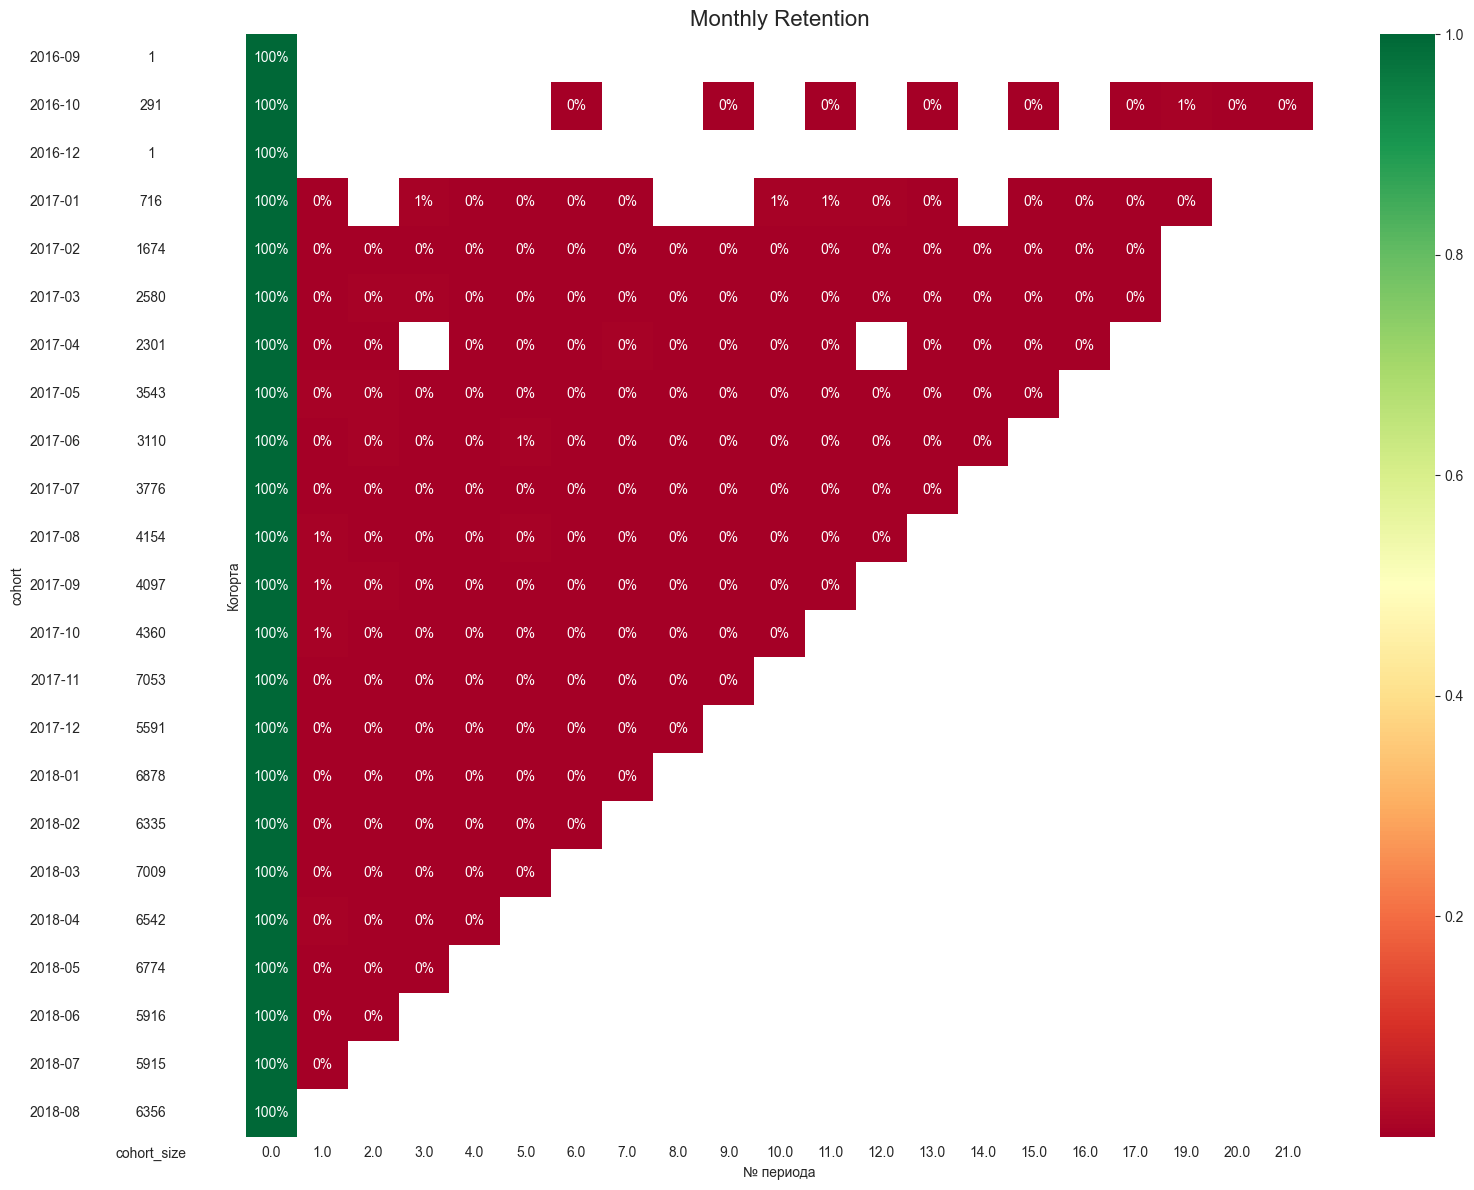

In [31]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

In [32]:
# Берем для примера данные по количеству заказов клиентов когорты августа 2017 года
df_2017_08 = cohort_pivot.iloc[10, 0:13].to_frame().reset_index()

In [33]:
df_2017_08.columns = ['month', 'n_orders']
df_2017_08

,month,n_orders
0,0.0,4154.0
1,1.0,27.0
2,2.0,11.0
3,3.0,15.0
4,4.0,16.0
5,5.0,19.0
6,6.0,10.0
7,7.0,10.0
8,8.0,6.0
9,9.0,7.0


<Axes: xlabel='month', ylabel='n_orders'>

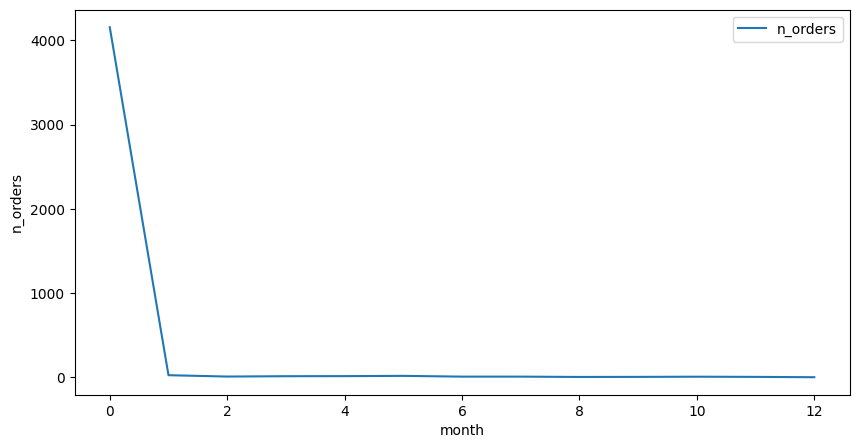

In [34]:
# Строим график повторных заказов 
fig = plt.figure(figsize=(10, 5))
sns.lineplot(data=df_2017_08, x='month', y='n_orders', label='n_orders')

In [35]:
# На графике явно видно, что product/market fit у маркетплейса отсутствует

In [36]:
# Смотрим заказы, которые доставили клиентам с задержкой
orders['diff'] = orders.order_estimated_delivery_date - orders.order_delivered_customer_date

In [37]:
orders['diff'] = orders['diff'].dt.days

In [38]:
orders.query('diff < 0').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,-12.0
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,-10.0
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,-1.0
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,-8.0
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-2.0


In [39]:
orders.query('order_status == "unavailable"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,NaN
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,NaN
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,NaN
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,NaN
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,NaN


In [40]:
# Первая метрика: Общий объем продаж (Gross Merchandise Volume, GMV)
# GMV — это общая сумма всех продаж

In [41]:
# Считаем стоимость каждого заказа
order_value = order_items.groupby('order_id', as_index=False) \
    .agg({'price': 'sum'}) \
    .rename(columns={'price': 'order_value'})
order_value.head()

,order_id,order_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [42]:
# Оставляем подтвержденные (оплаченные) заказы, исключив отмененные 
order_value_new = pd.merge(orders_copy_filtered, order_value, on='order_id', how='inner')
order_value_new.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90


In [43]:
# Смотрим на количество оплаченных заказов по месяцам 
order_value_new['payment_month'] = order_value_new['order_approved_at'].dt.to_period('M')
order_value_new.groupby('payment_month', as_index=False) \
               .agg({'order_value': 'count'}) \
               .rename(columns={'order_value': 'n_orders'})

,payment_month,n_orders
0,2016-09,1
1,2016-10,291
2,2016-12,1
3,2017-01,750
4,2017-02,1703
5,2017-03,2626
6,2017-04,2352
7,2017-05,3642
8,2017-06,3214
9,2017-07,3899


In [44]:
# Так как за сентябрь 2018 года еще нет данных о других заказах, этот месяц исключим из визуализации

In [45]:
# Считаем Общий объем продаж (GMV) по месяцам
GMV = order_value_new.groupby('payment_month', as_index=False) \
                     .agg(GMV=('order_value', 'sum')) \
                     .sort_values('payment_month') \
                     .iloc[:23, :]
GMV.head()

,payment_month,GMV
0,2016-09,134.97
1,2016-10,44580.19
2,2016-12,10.90
3,2017-01,114646.11
4,2017-02,245097.41


C:\Users\User\AppData\Local\Temp\ipykernel_10184\3145409233.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(GMV.payment_month, rotation=90)


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

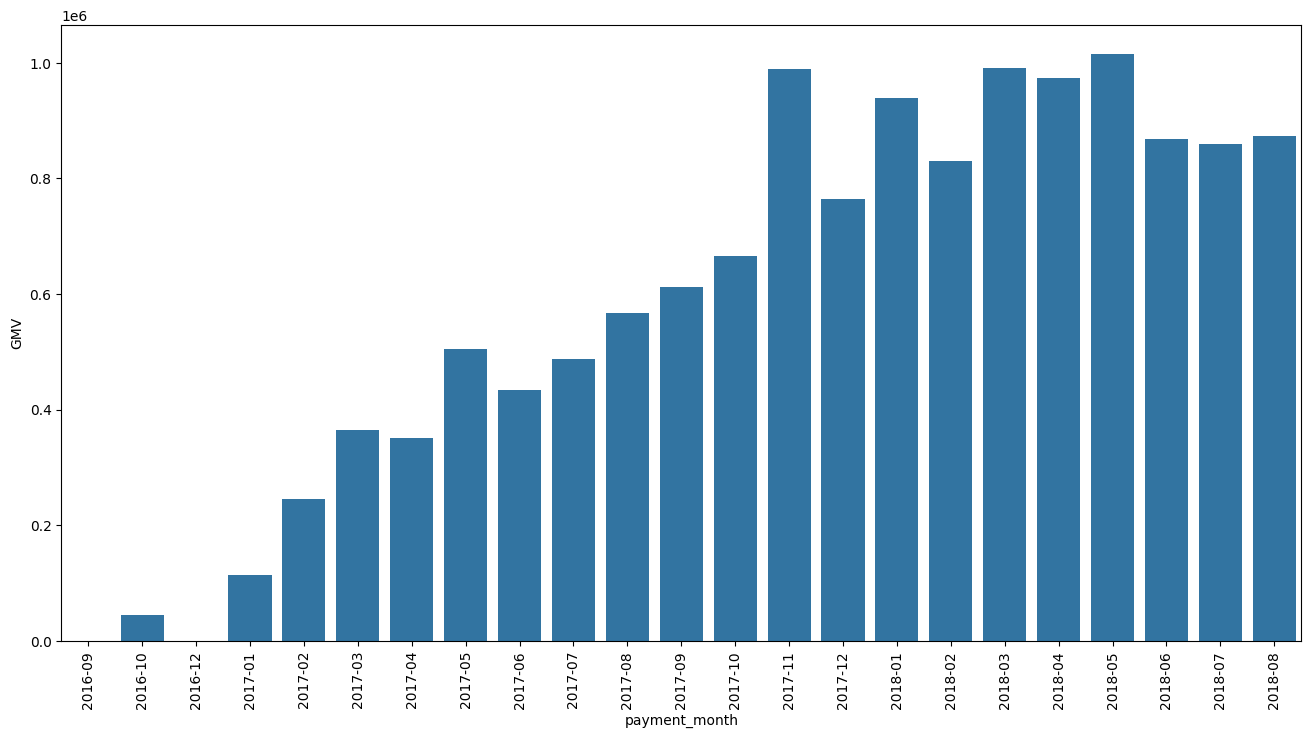

In [46]:
# Строим график
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(data=GMV, x='payment_month', y='GMV')
ax.set_xticklabels(GMV.payment_month, rotation=90)
sns.despine

In [47]:
# Вторая метрика: MAU (Monthly Active Users) - количество уникальных пользователей за месяц

In [48]:
customer_unique_month = pd.merge(order_value_new, customers, on='customer_id', 
                                 how='inner')[['customer_unique_id', 'payment_month']]
customer_unique_month.head()

,customer_unique_id,payment_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02


In [49]:
MAU = customer_unique_month.groupby('payment_month', as_index=False) \
    .agg(MAU=('customer_unique_id', 'nunique')).iloc[:23, :]

C:\Users\User\AppData\Local\Temp\ipykernel_10184\2202269514.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(MAU.payment_month, rotation=90)


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

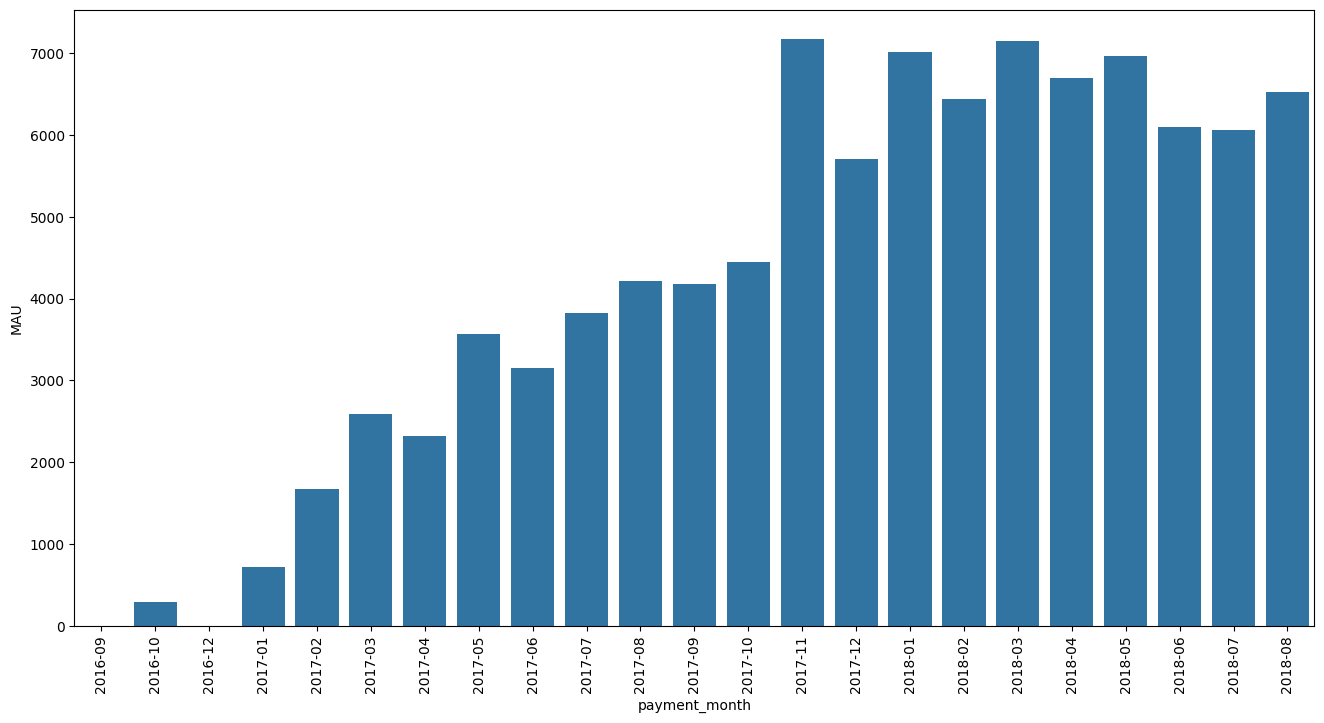

In [50]:
# Строим график
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(data=MAU, x='payment_month', y='MAU')
ax.set_xticklabels(MAU.payment_month, rotation=90)
sns.despine

In [51]:
# Третья метрика: Конверсия в оплату (отражает заинтересованность новых клиентов в продукте)

In [52]:
# Четвертая метрика: Коэффициент оттока (Churn Rate)

In [53]:
# Считаем коэффициент оттока по когорте клиентов мая 2017 года
retention_2017_05 = retention_matrix.iloc[7, :16].to_frame().reset_index()
retention_2017_05.columns = ['month', 'retention']
retention_2017_05.retention = retention_2017_05.retention * 100
retention_2017_05['churn_rate'] = 100 - retention_2017_05.retention
retention_2017_05

,month,retention,churn_rate
0,0.0,100.000000,0.000000
1,1.0,0.423370,99.576630
2,2.0,0.423370,99.576630
3,3.0,0.366921,99.633079
4,4.0,0.366921,99.633079
5,5.0,0.338696,99.661304
6,6.0,0.338696,99.661304
7,7.0,0.141123,99.858877
8,8.0,0.310471,99.689529
9,9.0,0.254022,99.745978


<Axes: xlabel='month', ylabel='churn_rate'>

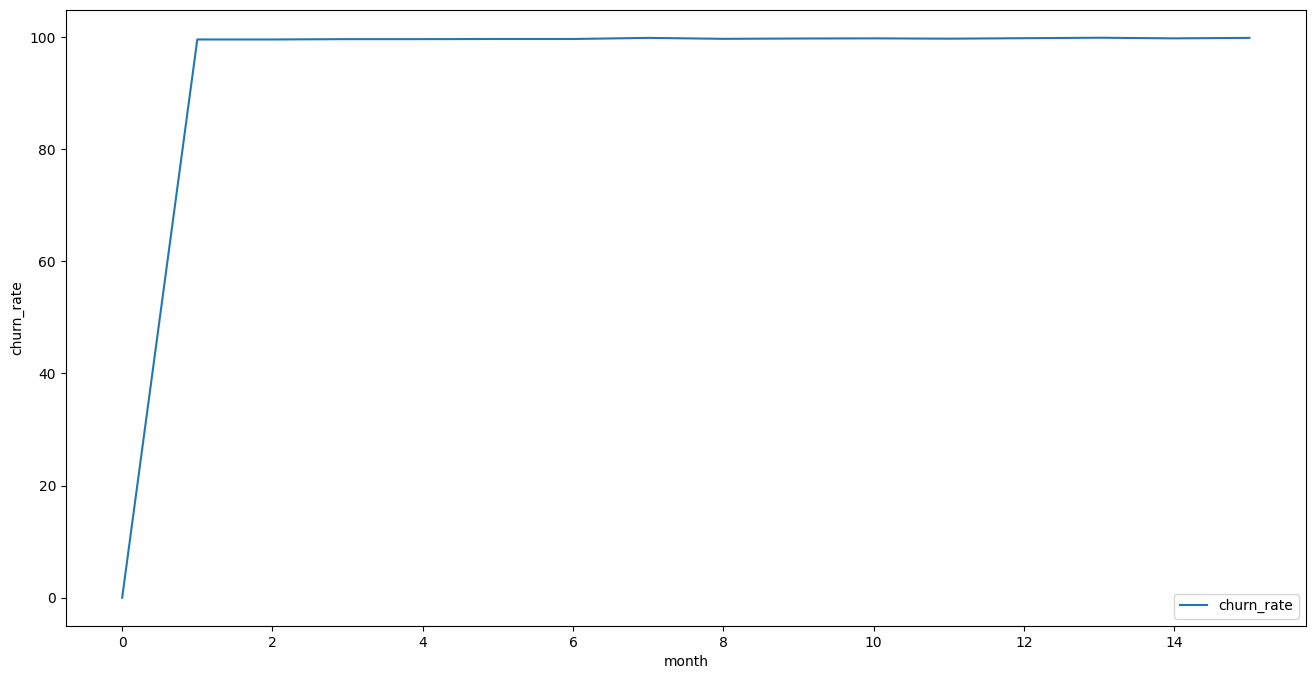

In [54]:
# Строим график коэффициента оттока 
fig = plt.figure(figsize=(16, 8))
sns.lineplot(data=retention_2017_05, x='month', y='churn_rate', label='churn_rate')

In [55]:
# Пятая метрика: Средний доход на пользователя (ARPU)

In [56]:
df_ARPU = pd.merge(GMV, MAU, on='payment_month')

In [57]:
df_ARPU['ARPU'] = (df_ARPU.GMV / df_ARPU.MAU).round(2)

In [92]:
df_ARPU.head()

,payment_month,GMV,MAU,ARPU
0,2016-09,134.97,1,134.97
1,2016-10,44580.19,288,154.79
2,2016-12,10.90,1,10.90
3,2017-01,114646.11,717,159.90
4,2017-02,245097.41,1678,146.07


C:\Users\User\AppData\Local\Temp\ipykernel_10184\4094993842.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_ARPU.payment_month, rotation=90)


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

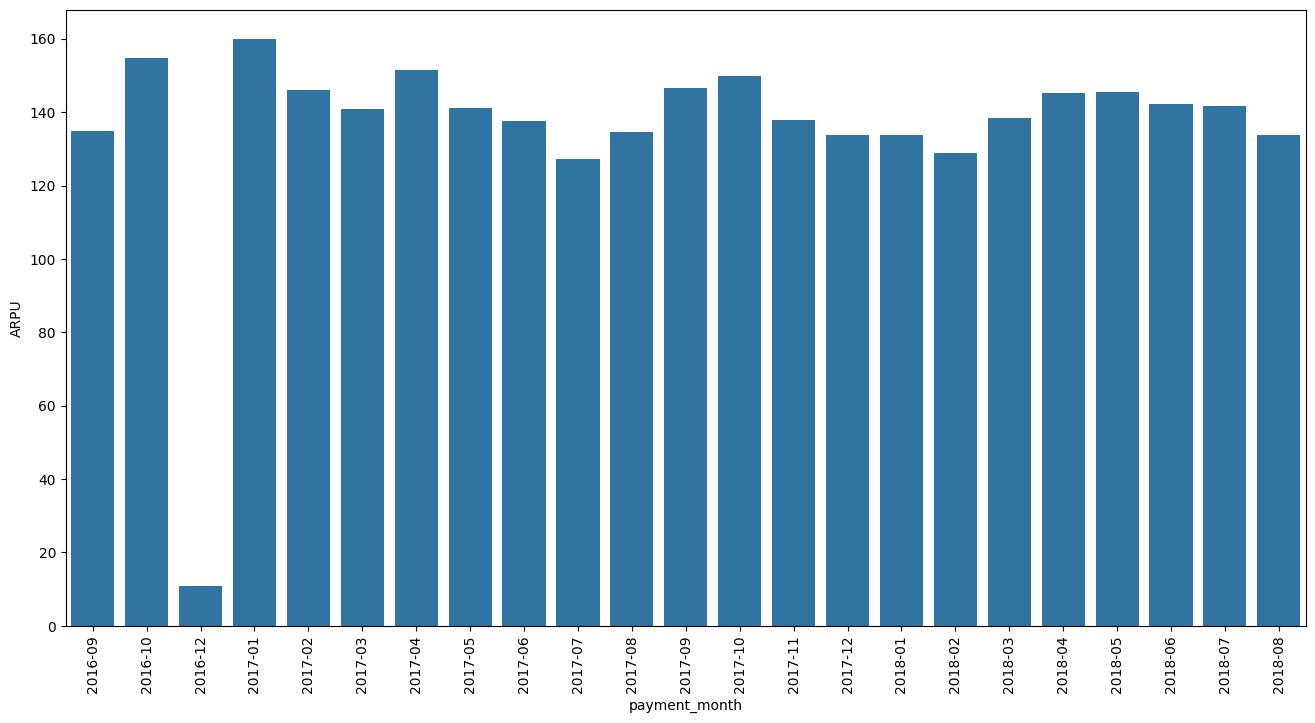

In [59]:
# Строим график
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_ARPU, x='payment_month', y='ARPU')
ax.set_xticklabels(df_ARPU.payment_month, rotation=90)
sns.despine

In [60]:
# Данные с июня 2017 года
# Гипотеза 1: Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой
# отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом
# избавимся от всех отмен.

In [61]:
orders['date'] = orders['order_purchase_timestamp'].dt.to_period('M')

In [62]:
excluded_statuses

['canceled', 'unavailable']

In [63]:
df_n_cancellations = orders.query('order_status in @excluded_statuses') \
    .groupby('date', as_index=False) \
    .agg(n_cancellations=('order_id', 'count')) \
    .iloc[7:, :]

In [64]:
df_n_cancellations.n_cancellations.sum()

np.int64(974)

In [65]:
# Impact 1ой гипотезы составляет 5

In [66]:
# Гипотеза 2: Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием,
# вследствие чего количество заказов увеличится за счёт повторных заказов. 

In [67]:
# Конверсия в повторный заказ (CRO) = 0.35 % 
CRO = 0.0035

In [68]:
df_n_delays = orders.query('diff < 0').groupby('date', as_index=False).agg(n_delays=('diff', 'count')).iloc[7:, :]

In [69]:
df_n_delays['repeat_orders'] = (df_n_delays.n_delays * CRO).round()

In [70]:
df_n_delays

,date,n_delays,repeat_orders
7,2017-06,121,0.0
8,2017-07,133,0.0
9,2017-08,139,0.0
10,2017-09,216,1.0
11,2017-10,237,1.0
12,2017-11,1043,4.0
13,2017-12,462,2.0
14,2018-01,464,2.0
15,2018-02,1049,4.0
16,2018-03,1496,5.0


In [71]:
df_n_delays.repeat_orders.sum()

np.float64(25.0)

In [72]:
# Impact 2ой гипотезы составляет 1

In [73]:
# Гипотеза 3: Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, 
# то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится 
# за счёт повторных заказов тех, кто раньше не делал повторный заказ.

In [74]:
df_one_order = customers.groupby('customer_unique_id', as_index=False) \
    .agg(n_orders=('customer_id', 'count')) \
    .query('n_orders == 1')

In [75]:
df_one_order_2 = pd.merge(df_one_order, customers, on='customer_unique_id', how='inner')
df_one_order_2.head()

,customer_unique_id,n_orders,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,fadbb3709178fc513abc1b2670aa1ad2,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4cb282e167ae9234755102258dd52ee8,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,9b3932a6253894a02c1df9d19004239f,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,914991f0c02ef0843c0e7010c819d642,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP


In [83]:
df_n_orders = pd.merge(orders, df_one_order_2, on='customer_id', how='inner') \
    .groupby('date', as_index=False) \
    .agg({'n_orders': 'count'}) \
    .iloc[7:, :]

In [84]:
df_n_orders['repeat_orders'] = (df_n_orders.n_orders * CRO).round()

In [85]:
df_n_orders

,date,n_orders,repeat_orders
7,2017-06,2966,10.0
8,2017-07,3708,13.0
9,2017-08,3987,14.0
10,2017-09,3940,14.0
11,2017-10,4300,15.0
12,2017-11,7069,25.0
13,2017-12,5333,19.0
14,2018-01,6807,24.0
15,2018-02,6207,22.0
16,2018-03,6791,24.0


In [86]:
df_n_orders.repeat_orders.sum()

np.float64(290.0)

In [87]:
# Impact 3 гипотезы составляет 3

In [88]:
data = {
    'Гипотеза': ['Первая', 'Вторая', 'Третья'],
    'Impact': [5, 1, 3],
    'Confidence': [8, 10, 5],
    'Ease': [6, 4, 9]
}

In [89]:
df_ICE = pd.DataFrame(data)
df_ICE['ICE'] = df_ICE.Impact * df_ICE.Confidence * df_ICE.Ease

In [90]:
df_ICE

,Гипотеза,Impact,Confidence,Ease,ICE
0,Первая,5,8,6,240
1,Вторая,1,10,4,40
2,Третья,3,5,9,135
